# Análise Mercado Financeiro


In [1]:
# Obtençado dos dados

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 petr = yf.download('PETR4.SA', start= '2019-01-01', end='2022-07-01')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

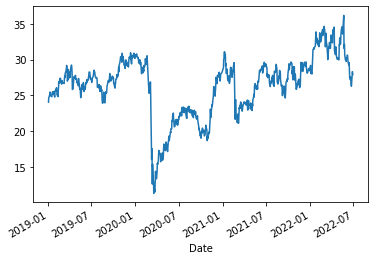

In [4]:
petr.Close.plot()

# Médias Móveis

<AxesSubplot:xlabel='Date'>

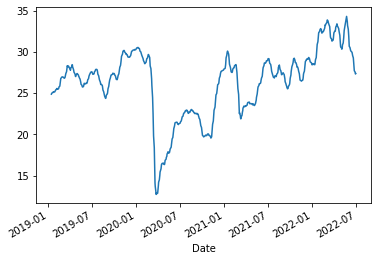

In [10]:
petr.Close.rolling(9).mean().plot()

# Retornos Diários


In [11]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,22.549999,24.200001,22.280001,24.059999,15.523998,104534800
2019-01-03,23.959999,24.820000,23.799999,24.650000,15.904679,95206400
2019-01-04,24.850000,24.940001,24.469999,24.719999,15.949849,72119800
2019-01-07,24.850000,25.920000,24.700001,25.110001,16.201485,121711900
2019-01-08,25.400000,25.420000,24.770000,24.959999,16.104698,68761800


In [12]:
petr['Adj Close'].pct_change()

Date
2019-01-02         NaN
2019-01-03    0.024522
2019-01-04    0.002840
2019-01-07    0.015777
2019-01-08   -0.005974
                ...   
2022-06-24   -0.007550
2022-06-27    0.064283
2022-06-28    0.012509
2022-06-29   -0.008825
2022-06-30   -0.005342
Name: Adj Close, Length: 867, dtype: float64

In [14]:
retornos= pd.DataFrame(petr['Adj Close'].pct_change())
retornos

,Adj Close
Date,
2019-01-02,NaN
2019-01-03,0.024522
2019-01-04,0.002840
2019-01-07,0.015777
2019-01-08,-0.005974
...,...
2022-06-24,-0.007550
2022-06-27,0.064283
2022-06-28,0.012509


<AxesSubplot:xlabel='Date'>

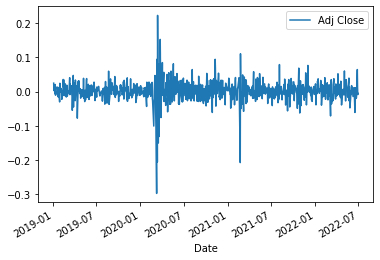

In [15]:
retornos.plot()

In [16]:
#Retorno diário médio

retornos.mean() 

Adj Close    0.00115
dtype: float64

<AxesSubplot:xlabel='Date'>

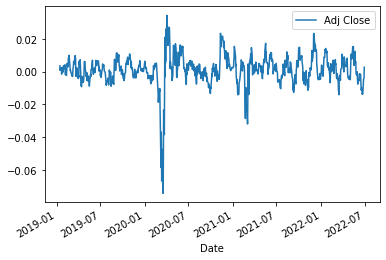

In [18]:
#Média movel dos retornos

retornos.rolling(9).mean().plot()

# Volatilidade

In [20]:
#A medida mais básica de volatilidade que podemos ter é o desvio padrao

retornos.std()

Adj Close    0.030135
dtype: float64

<AxesSubplot:xlabel='Date'>

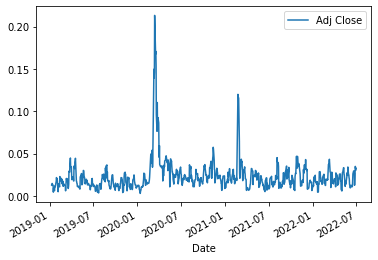

In [23]:
retornos.rolling(5).std().plot()

# Métricas Estastísticas


In [24]:
retornos.describe()

,Adj Close
count,866.000000
mean,0.001150
std,0.030135
min,-0.296978
25%,-0.011606
50%,0.000824
75%,0.014203
max,0.222222


# Distribuiçao dos Retornos


<AxesSubplot:ylabel='Frequency'>

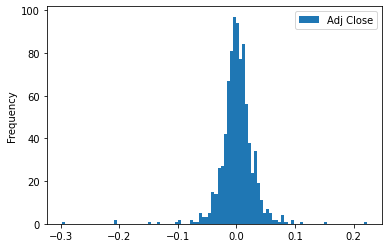

In [32]:
retornos.plot.hist(bins= 100)

# Drawdown 

In [33]:
#Perda maxima em um determinado periodo - distancia entre ganho maximo e minima

dd_30 = retornos.rolling(30).min()

<AxesSubplot:xlabel='Date'>

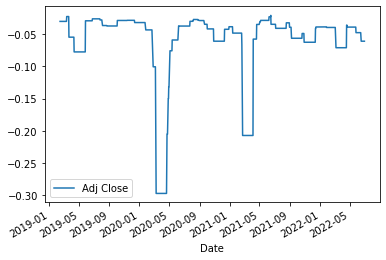

In [34]:
dd_30.plot()

# Retorno Acumulado

In [39]:
ret_acum = (retornos+1).cumprod()
ret_acum

,Adj Close
Date,
2019-01-02,NaN
2019-01-03,1.024522
2019-01-04,1.027432
2019-01-07,1.043641
2019-01-08,1.037407
...,...
2022-06-24,1.693507
2022-06-27,1.802371
2022-06-28,1.824916


<AxesSubplot:xlabel='Date'>

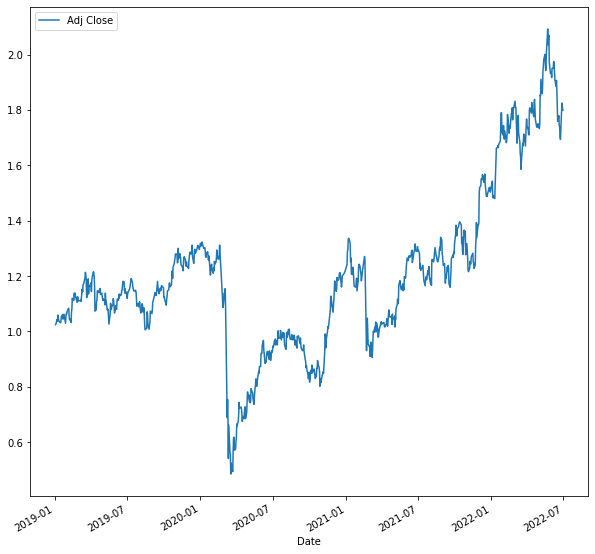

In [42]:
ret_acum.plot(figsize=(10,10))

In [44]:
#cumulativo maximo

picos = ret_acum.cummax()
picos


,Adj Close
Date,
2019-01-02,NaN
2019-01-03,1.024522
2019-01-04,1.027432
2019-01-07,1.043641
2019-01-08,1.043641
...,...
2022-06-24,2.092535
2022-06-27,2.092535
2022-06-28,2.092535


<AxesSubplot:xlabel='Date'>

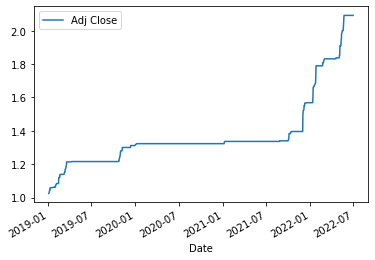

In [45]:
picos.plot()

# Outra forma de calcular o drawdown



<AxesSubplot:xlabel='Date'>

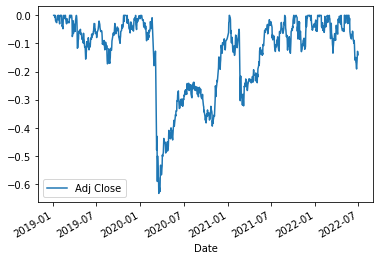

In [46]:
drawdown = (ret_acum - picos)/picos
drawdown.plot()

In [48]:
drawdown.min()

Adj Close   -0.633561
dtype: float64

In [49]:
max_ddw = drawdown.min()
max_ddw*100

Adj Close   -63.356055
dtype: float64

In [50]:
retornos['Retorno Acumulado'] = ret_acum
retornos['Picos'] = picos
retornos['Drawdown'] = drawdown
retornos.head()

,Adj Close,Retorno Acumulado,Picos,Drawdown
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.024522,1.024522,1.024522,0.000000
2019-01-04,0.002840,1.027432,1.027432,0.000000
2019-01-07,0.015777,1.043641,1.043641,0.000000
2019-01-08,-0.005974,1.037407,1.043641,-0.005974


<AxesSubplot:xlabel='Date'>

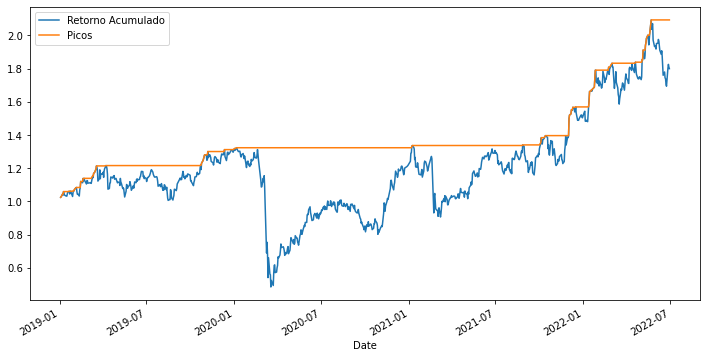

In [53]:
retornos[['Retorno Acumulado', 'Picos']].plot( figsize = (12,6))

# Normalização


In [54]:
acoes = ['PETR4.SA' , 'WEGE3.SA', 'MGLU3.SA']


In [57]:
data = yf.download(acoes, start= '2019-01-01', end= '2022-01-01')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [58]:
data.head()

,MGLU3.SA,PETR4.SA,WEGE3.SA
Date,,,
2019-01-02,5.641579,15.523998,8.553488
2019-01-03,5.581217,15.904681,8.748533
2019-01-04,5.411353,15.949847,8.848435
2019-01-07,5.495374,16.201479,8.710476
2019-01-08,5.451089,16.104704,8.639117


<AxesSubplot:xlabel='Date'>

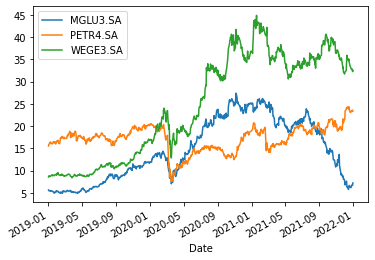

In [59]:
#Ativos com magnitudes diferentes distorcem as analises


data.plot()

In [61]:
normal = data/data.iloc[0]
normal

,MGLU3.SA,PETR4.SA,WEGE3.SA
Date,,,
2019-01-02,1.000000,1.000000,1.000000
2019-01-03,0.989301,1.024522,1.022803
2019-01-04,0.959191,1.027432,1.034483
2019-01-07,0.974084,1.043641,1.018354
2019-01-08,0.966235,1.037407,1.010011
...,...,...,...
2021-12-23,1.098983,1.496908,3.855602
2021-12-27,1.201791,1.519100,3.821043
2021-12-28,1.210654,1.520685,3.834867


<AxesSubplot:xlabel='Date'>

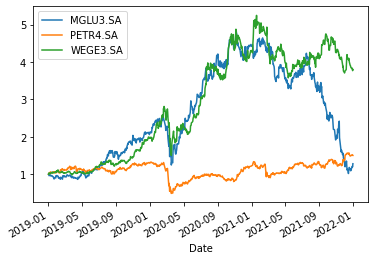

In [62]:
normal.plot()